<a href="https://colab.research.google.com/github/CeliaMi/Machine_Learning/blob/main/ML_S6_NLP_practice_Text_vectorization_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="img/aism_logo.png" alt="Logo AI Saturdays Madrid" title="Logo AI Saturdays Madrid" width="150"/></center>

# Vectorización _(text representation)_

La gran mayoría de algoritmos de aprendizaje automático no pueden trabajar con el texto en bruto. Necesitamos extraer una serie de características de este texto de modo que lo que pasemos al algoritmo sean atributos numéricos, es decir, para que un texto pueda ser procesado por una máquina usando métodos de aprendizaje automático primero debe convertirse en números. Este es el propósito de la representación del texto o _**vectorización**_.

Esto se debe a que las computadoras no entienden el texto en sí ni las relaciones entre palabras y oraciones, por lo que necesitamos una forma de representar estas palabras con números que es lo que las computadoras sí que entienden.

El lenguaje es información no estructurada que ha sido creada por personas para ser entendida por otras personas. Por el contrario, los datos estructurados o semiestructurados incluyen campos o etiquetas de marcado que permiten que una computadora pueda analizarlos fácilmente.

Sin embargo, aunque no presentan una estructura fácil de leer por una máquina, los datos no estructurados no son aleatorios, es decir, el lenguaje se rige por una serie de propiedades lingüísticas que lo hacen comprensible para las personas.

Como ya hemos comentado, mientras el lenguaje se formula como texto o cadenas los modelos de aprendizaje automático operan en el espacio de los números reales. La vectorización del texto consiste en convertirlo en una serie de vectores de números que la máquina pueda entender.

Generalmente, se usa el término vectorización para referirse a un conjunto de técnicas de aprendizaje de características y modelado del lenguaje en el procesamiento del lenguaje natural (PNL) donde las palabras o frases del vocabulario se asignan a vectores de números reales.

Según cómo queramos procesar el texto podemos mantener cada observación como un documento o dividirlo en tokens más pequeños. La granularidad de los tokens queda a nuestra discreción pudiéndose crear los tokens a nivel de documento, frase, palabra o incluso carácter.

Cuando hablamos de _**documento**_ nos referimos a una entidad de texto ininterrumpida que es de interés para el problema. Por ejemplo, en un sistema de clasificación de _spam_ consideraríamos cada mensaje como un documento.

Una vez vectorizado el texto podremos extraer atributos o características del mismo _(feature extraction)_ y procesarlo usando los algoritmos de aprendizaje automático.

Para guardar las matrices vectorizadas usaremos Numpy arrays o matrices dispersas, nunca DataFrames que son mucho más lentos a la hora de hacer cálculos.

Para modelar los datos del lenguaje el tamaño de entrada en todas las observaciones presentes y futuras debe ser el mismo. Si dividimos nuestro texto en tokens, encontraremos un problema en el que un texto más largo contiene más tokens que otros. La solución es truncar el texto más largo o rellenar los datos de entrada de los más cortos según un tamaño de entrada que hayamos designado.

Como veremos, en el modelo de espacio vectorial con el que vamos a trabajar cada token es un eje o dimensión, representándose cada texto o documento como un vector en ese espacio multidimensional. El número de palabras únicas será el número de dimensiones.

Hay diferentes técnicas de vectorización:

* _Bag of words_
* _Term Frequency/Inverse Document Frequency_
* _One Hot Encoding_
* _HashingVectorizer_
* _Word embeddings_
* _Contextualized Word Embeddings_

Vamos a ver aquí las 3 primeras.

## Bolsa de palabras _(Bag of words - BoW)_

_**Bag of words**_ es una técnica para analizar las características o atributos de un documento. Los atributos del texto son las palabras únicas que aparecen en el corpus y el número de ocurrencias de cada una de estas palabras en cada documento.

BoW es una técnica de extracción de características en la que el resultado es un espacio vectorial que representa cada documento en el corpus. Es la forma más sencilla de representar los textos como vectores de números.

La longitud de este vector (dimensiones) corresponde al número de palabras únicas en el corpus (sin repetición, cada palabra aparece solo una vez).

Hay diferentes tipos de BOW donde cada uno extiende o modifica el modelo base. En el modelo base lo que se hace es contar cuántas veces aparece un token en cada texto, es decir, usamos las palabras tokenizadas para cada observación o documento y calculamos la frecuencia de cada token.

<center><img src="img/bow_1.png" alt="Bag of Words" title="Bag of Words" width="700" /></center>

Fuente: ["Applied Text Analysis with Python"](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/) por Benjamin Bengfort, Rebecca Bilbro, y Tony Ojeda

Tomemos como ejemplo el siguiente corpus formado por dos documentos:
```
doc1 = "Alicia adora la pasta"
doc2 = "Alicia adora la verdura. Alicia y Luis son amigos"
```

Como podemos ver, tenemos 9 palabras únicas en nuestro corpus (por simplificar hemos ignorado los signos de puntuación). Por lo tanto, nuestro vector tendrá un tamaño de 9.

<center><img src="img/bow_2.png" alt="Bag of Words" title="Bag of Words" width="700" /></center>

Estos vectores ayudan a comparar documentos, ya que realiza un seguimiento de todas las palabras que aparecen en los documentos, y su forma sencilla de procesarlas con solo contarlas es fácilmente comprensible y nos da una imagen clara de las palabras más importantes en general.

Una forma de reducir la pérdida de contexto con BoW es crear vocabularios de palabras agrupadas en lugar de palabras individuales. Estas palabras agrupadas se denominan _**n-gramas**_, donde $n$ es el tamaño de la agrupación. El enfoque resultante se llama _**bag of n-grams (BNG)**_ o _**co-occurrence vectorizer**_.

La ventaja de BNG es que cada n-grama captura más contexto que las palabras individuales. Sin embargo hay que tener en cuenta que el coste de encontrar los n-gramas crece polinomialmente a medida que aumenta el tamaño del vocabulario, por lo que generalmente nos limitaremos a n-gramas de 2 (bigramas) o 3 (trigramas).

Si bien la técnica de BoW es útil en algunos casos de uso, tiene algunas limitaciones:
* No mantiene la estructura del documento y descarta la gramática (no mantiene el orden de las palabras, sino que solo las cuenta).
* Tiene el problema de la dispersión, es decir, la mayoría de los valores en el vector son ceros lo que aumenta la complejidad y añade sesgo al modelo. Al contar todas las apariciones a lo largo de los documentos, podemos terminar fácilmente con una matriz compuesta por vectores llenos de ceros ya que, por supuesto, cada documento solo contendrá una pequeña cantidad de todas las palabras posibles.
* Las palabras vacías (como `y`, `la`, etc.) aparecen muchas veces más que las otras palabras enmascarando las palabras más significativas. Esto añade ruido al análisis y hacen que las palabras más importante no tengan el peso adecuado.
* Puede ocurrir que tengamos un documento en el que una palabra específica aparece tantas veces que termine pareciendo que es la palabra más común en todos los documentos, cuando lo que ocurre realmente es que aparece muchas veces en un solo documento.
* BoW genera una matriz de tamaño fijo con todas las palabras (o las de ciertas frecuencias) que aparecen en nuestros documentos actuales. Esto podría ser un problema si recibimos más documentos en el futuro y no sabemos las palabras que podríamos encontrar.

Resumiendo, podemos decir que un BoW en su forma más simple no es más que un documento representado como un vector del conteo de palabras. A esto también se le denomina _frecuency vectors_ o _count vectors_.

Podemos usar para crear la BoW la clase `CountVectorizer` de la librería Scikit-learn o la clase `Counter` de NLTK.

Previo a la utilización del modelo BoW será necesario preprocesar el texto (convertir a minúsculas, eliminar puntuación, eliminar stopwords, lematizar, etc.), siempre dependiendo de nuestro problema.

Más información del modelo Bag of Words en la [Wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model).

### BoW usando Python

Vamos a ver un ejemplo sencillo de BoW usando solo Python, es decir, sin recurrir a ninguna librería especializada.

Lo primero que hacemos es **crear un corpus** formado en este caso por dos documentos, por simplicidad no usamos signos de puntuación.

In [ ]:
%%writefile /content/drive/MyDrive/data_saturdays/doc_1.txt
Esto es una historia sobre gatos
nuestras mascotas felinas
Los gatos son animales peludos

Overwriting /content/drive/MyDrive/data_saturdays/doc_1.txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%writefile /content/drive/MyDrive/data_saturdays/doc_2.txt
Esta es una historia sobre surf
Coger olas es divertido
Surfear es un deporte de agua popular

Overwriting /content/drive/MyDrive/data_saturdays/doc_2.txt


El siguiente paso es **construir el vocabulario**. El objetivo es crear un diccionario con todas las palabras que aparecen en cada documento dando a cada una de ellas un identificador único, en este caso un número. Más adelante crearemos instancias (vectores) para cada documento individual.

In [ ]:
vocab = {}
i = 1

with open('/content/drive/MyDrive/data_saturdays/doc_1.txt') as f:
    x = f.read().lower().split()  # Ponemos el texto en minúsculas y tokenizamos

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word] = i
        i += 1

print(vocab)

{'esto': 1, 'es': 2, 'una': 3, 'historia': 4, 'sobre': 5, 'gatos': 6, 'nuestras': 7, 'mascotas': 8, 'felinas': 9, 'los': 10, 'son': 11, 'animales': 12, 'peludos': 13}


In [ ]:
with open('/content/drive/MyDrive/data_saturdays/doc_2.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word] = i
        i += 1

print(vocab)

{'esto': 1, 'es': 2, 'una': 3, 'historia': 4, 'sobre': 5, 'gatos': 6, 'nuestras': 7, 'mascotas': 8, 'felinas': 9, 'los': 10, 'son': 11, 'animales': 12, 'peludos': 13, 'esta': 14, 'surf': 15, 'coger': 16, 'olas': 17, 'divertido': 18, 'surfear': 19, 'un': 20, 'deporte': 21, 'de': 22, 'agua': 23, 'popular': 24}


Aunque `doc_2.txt` tiene 17 palabras, solo se añaden las que no estaban ya.

Ahora que hemos encapsulado "todo nuestro lenguaje" en un diccionario, vamos a **extraer ciertas características** de cada uno de los documentos originales.

In [ ]:
# Creamos un vector vacío con espacio para cada palabra en el vocabulario
doc_1 ='/content/drive/MyDrive/data_saturdays/doc_1.txt'
doc_2 ='/content/drive/MyDrive/data_saturdays/doc_2.txt'
one = [doc_1] + [0] * len(vocab)
print(one)

['/content/drive/MyDrive/data_saturdays/doc_1.txt', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Mapeamos las frecuencias de cada palabra en doc_1.txt a nuestro vector
with open(doc_1) as f:
    x = f.read().lower().split()

for word in x:
    one[vocab[word]] += 1

print(one)

['/content/drive/MyDrive/data_saturdays/doc_1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


La mayoría de las palabras en `doc_1.txt` solo aparecen una vez, pero `gatos` aparece dos veces.

In [ ]:
# Hacemos lo mismo con el segundo documento
two = [doc_2] + [0] * len(vocab)

with open(doc_2) as f:
    x = f.read().lower().split()

for word in x:
    two[vocab[word]] += 1

In [ ]:
# Comparamos ambos vectores
print(f'{one}\n{two}')

['/content/drive/MyDrive/data_saturdays/doc_1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['/content/drive/MyDrive/data_saturdays/doc_2.txt', 0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Comparando ambos vectores podemos ver que algunas palabras son comunes a los dos, algunas aparecen solo en `doc_1.txt`, y otras solo en `doc_2.txt`. Ampliar esta lógica a cientos de miles de documentos hará que el vocabulario crezca con cientos de miles de palabras.

Estos vectores contienen en su mayoría ceros, lo que los convierte en **_matrices dispersas_** o _sparse matrix_.

Algunas palabras vacías como `de` e `y` que aparecen de manera tan frecuente y en tantos documentos no necesitamos molestarnos en contarlas por lo que conviene eliminarlas antes de hacer el conteo, pero como siempre esto dependerá del problema al que nos enfrentemos.

Además, puede que solo sea necesario quedarse con la raíz de la palabra, como por ejemplo `gato` en lugar tanto de `gato`, como de `gata`, `gatos` y `gatas`. Esto también hará que el vector de nuestro vocabulario sea más pequeño y mejore el rendimiento, pero esto dependerá del problema en el que estemos trabajando.

Al crear nuestros vectores lo primero que hemos hecho ha sido dividir los textos usando los espacios en blanco con `split()`. Esto es una forma muy básica de tokenización en la que hemos dividido en texto en palabras.

Además, tampoco nos hemos preocupado por la puntuación y las diferentes categorías gramaticales. En las aplicaciones reales nos basaremos en una morfología bastante más sofisticada para analizar el texto de manera adecuada.

Así, una vez que se ha dividido el texto podemos etiquetar nuestros tokens con información sobre su categoría gramatical, las dependencias gramaticales, etc. Esto añade más dimensiones a nuestros datos y nos permite una comprensión más profunda del contexto de documentos específicos.

### BoW usando `CountVectorizer` de Scikit-learn

El preprocesamiento de los textos, la tokenización y la habilidad de filtrar las palabras vacías está todo incluido en la clase [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) de Scikit-Learn, quien construye un diccionario de características y transforma los documentos en vectores de características.

`CountVectorizer` cuenta el número de ocurrencias de cada palabra. Trata cada palabra como una característica y cuenta el número de ocurrencias de cada una de ellas en cada documento siendo cada uno de ellos un registro.

Al final obtenemos una matriz llamada **_document term matrix (DTM)_** en la que cada fila es un documento, mensaje, etc. y cada columna una palabra o término. Esta DTM es una matrix dispersa ya que va a contener muchos ceros puesto que no todos los documentos del corpus contienen todas las palabras.

Para construirla se cuenta el número de veces que cada una de las palabra del vocabulario del corpus completo aparece en cada documento concreto.

Vamos a ver un ejemplo en el que vamos a trabajar con una serie de mensajes en los que algunos de ellos han sido marcados como _spam_. Lo primero que haremos será importar las librerías necesarias y los datos.

In [ ]:
# Importar librerías
import numpy as np
import pandas as pd

In [ ]:
# Importar datos
df = pd.read_csv('/content/drive/MyDrive/data_saturdays/smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
# Comprobamos si hay valores nulos
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
round(df['label'].value_counts()['ham'] / len(df) * 100, 2)

86.59

Al analizar la columna `label` vemos que 4825 de los 5572 mensajes son `ham`, lo que supone un 86,6% del total de mensajes. Esto significa que cualquier modelo de aprendizaje automático que creemos tiene que tener una tasa de acierto mayor del 86,6% para superar la probabilidad aleatoria.

El siguiente paso es dividir los datos en los conjuntos de entrenamiento y prueba.

In [ ]:
from sklearn.model_selection import train_test_split

Solo queremos usar como característica el texto de los mensajes.

In [ ]:
X = df['message']
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

El siguiente paso en construir la matriz de términos usando `CountVectorizer`.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vect = CountVectorizer()
#Entrenamos el vectorizador con los datos  y Transformamos el mensaje original en vector
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3733, 7082)

In [ ]:
# Guarda la matriz dispersa en un formato comprimido
X_train_counts

<3733x7082 sparse matrix of type '<class 'numpy.int64'>'
	with 49992 stored elements in Compressed Sparse Row format>

Esto nos dice que nuestro conjunto de entrenamiento está compuesto de 3733 documentos y 7082 características o tokens únicos (vocabulario).

Lo anterior también podemos verlo hecho en dos pasos:

1. Entrenamos el vectorizador con los datos (contruye el vocabulario, cuenta el número de palabras...)

```python
    count_vect.fit(X_train)
```
2. Transformamos el mensaje original en vector

```python
    X_train_counts = count_vect.transform(X_train)
```

Si queremos, podemos convertir la matriz dispersa en un DataFrame donde las columnas serán los términos del vocabulario y las filas los mensajes o documentos para así poder inspeccionarla.

In [ ]:
# Convertimos la matriz dispersa en un DataFrame
X_train_counts_df = pd.DataFrame.sparse.from_spmatrix(X_train_counts,
                                                      columns=count_vect.get_feature_names_out())

X_train_counts_df

,00,000,000pes,0089,0121,01223585236,01223585334,02,0207,02072069400,...,zealand,zebra,zed,zeros,zhong,zoe,zogtorius,zoom,zouk,èn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Comprobemos con un ejemplo que es correcto.

In [ ]:
X_train.iloc[1]

'I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones'

In [ ]:
X_train_counts_df.loc[1, 'to']

2

Vemos que el token `to` efectivamente aparece 2 veces en el texto.

## Term Frequency/Inverse Document Frequency (TF-IDF)

Podemos mejorar la técnica de los vectores de conteo simplemente ajustando el conteo de palabras a su frecuencia de aparición en el corpus, es decir, en el conjunto de todos los documentos. Para ello podemos usar _**TF-IDF**_ _(Term Frecuency - Inverse Document Frecuency)_.

TF-IDF significa _**frecuencia de términos**_ y _**frecuencia inversa de documentos**_ respectivamente y es una de las técnicas de NLP más populares y efectivas.

La idea principal detrás de esta técnica es que si un término aparece en algún texto con frecuencia, y rara vez en cualquier otro texto, ese término tiene más importancia para este texto. Esta técnica utiliza los algoritmos TF e IDF:

### TF (_term frecuency_ o frecuencia de términos)

Si bien contar palabras es útil, los documentos más largos tendrán valores de recuento promedio más altos que los documentos más cortos. Para evitar esto, podemos simplemente dividir el número de ocurrencias de cada palabra en un documento por el número total de palabras en el documento.

Así, TF muestra la frecuencia del término en el texto en comparación con el número total de palabras en el texto. Es una puntuación de la frecuencia de un término en un determinado documento y se define como la importancia de un término dentro de ese documento.

Dado que cada documento tiene una longitud diferente, es posible que un término aparezca muchas más veces en documentos largos que en documentos más cortos. La frecuencia del término a menudo se divide por la longitud del documento para normalizar, de esta manera, el número de veces que una palabra aparece en documentos largos puede ser comparada con el de documentos cortos.

$$\text{TF}(t, d) = \text{Nº de ocurrencias del término }t\text{ en el documento }d$$

Si los documentos a comparar tienen longitudes muy diferentes puede ser necesario dividir esto por la longitud del documento len(d).

$$\text{TF}(t, d) = \frac{f(t, d)}{\text{len}(d)}$$


### IDF (_inverse document frecuency_ o frecuencia inversa de documento)

El problema es que TF por si solo no es suficiente para un buen análisis de los textos. Así, si tenemos en cuenta palabras muy comunes como `de` o `y`, al ser tan comunes TF va a tender a poner énfasis en documentos que usan mucho estas palabras no dando suficiente peso a palabras más significativas como `gato` o `rojo` que aparecen de manera menos frecuente.

Así, puede ser complicado diferenciar documentos en base a la frecuencia de términos si una palabra aparece en la mayoría de ellos, y aquí es donde interviene el algoritmo IDF que es la frecuencia inversa de términos en el texto y muestra la importancia de cada término en el corpus.

Su misión es reducir las ponderaciones de las palabras que aparecen de forma más frecuente en muchos documentos del corpus y, por lo tanto, son menos informativas que las que aparecen solo en una parte más pequeña del corpus y que de esta forma se aumenta su peso.

Se calcula como un logaritmo del número de textos dividido por el número de textos que contienen este término. Es una puntuación de lo raro que es el término en el conjunto de documentos. Cuanto más raro es el término, mayor es la puntuación de IDF. Podemos definir la frecuencia inversa en el documento (Inverse Document Frecuency) como la importancia del término en el corpus.

$$\text{IDF}(t, D) = log_e(D/t)$$

Donde $D$ es el número total de documentos y $t$ es el número de documentos con el término.

Con esto no solo contamos las palabras sino que nos hacemos una idea de la importancia de cada término dentro del corpus de documentos. La frecuencia inversa del documento es una medida de cuánta información proporciona la palabra, es decir, si el término es común o raro en todos los documentos.

TF-IDF nos dice qué palabras son las más discriminantes entre documentos. Las palabras que aparecen mucho en un documento pero no en muchos documentos tienen un gran poder de discriminación. Destaca los términos muy específicos de un documento en particular mientras se suprimen los términos que son comunes a la mayoría de los documentos.

Así, TF-IDF es una medida estadística que se utiliza para evaluar la importancia de una palabra para un documento en una colección o corpus. La importancia aumenta en proporción al número de veces que aparece una palabra en un documento, pero se compensa con la frecuencia de la palabra en el corpus.

TF-IDF nos permite entender el contexto de las palabras a lo largo de todo el corpues de documentos y no solo su importancia relativa dentro de un único documento.

Esta reducción a escala denominada TF-IDF no es más que la frecuencia de términos multiplicada por frecuencia inversa de documento.

$$\text{TF-IDF} = \text{term frecuency} * \frac{1}{\text{document frecuency}}$$

$$\text{TF-IDF}(t, d, D) = \text{TD}(t, d) * \text{IDF}(t, D)$$

Finalmente, una vez calculadas, simplemente agregamos las puntuaciones de TF-IDF de cada término en vectores como en el BoW.

Los motores de búsqueda a menudo usan variaciones del esquema de ponderación TF-IDF como una herramienta central para calificar y clasificar la relevancia de un documento dada una consulta del usuario.

Siguiendo con nuestro ejemplo, en el que ya hemos realizado el conteo de palabras usando `CountVectorizer`, podemos calcular TF-IDF usando [`TfidfTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) de Scikit-Learn.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3733, 7082)

In [ ]:
X_train_tfidf

<3733x7082 sparse matrix of type '<class 'numpy.float64'>'
	with 49992 stored elements in Compressed Sparse Row format>

El método `fit_transform()` realiza dos operaciones, entrena un estimador con los datos y luego transforma nuestra matriz de conteo en una representación TF-IDF.

Igual que en el caso anterior, si queremos podemos crear una DataFrame con la matriz dispersa generada.

In [ ]:
# Convertimos la matriz dispersa en un DataFrame
X_train_tfidf_df = pd.DataFrame.sparse.from_spmatrix(X_train_tfidf,
                                                     columns=count_vect.get_feature_names_out())

X_train_tfidf_df

,00,000,000pes,0089,0121,01223585236,01223585334,02,0207,02072069400,...,zealand,zebra,zed,zeros,zhong,zoe,zogtorius,zoom,zouk,èn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.iloc[1]

'I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones'

In [ ]:
X_train_tfidf_df.loc[1, 'to']

0.12175375951774331

Podemos combinar los pasos de `CountVectorizer` y `TfidTransformer` en uno usando [`TfidVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

En este caso también se crea una DTM del corpus, pero en vez de rellenarla con un conteo de los tokens que aparecen en cada documento directamente calcula la puntuación TF-IDF para cada palabra.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf.shape

(3733, 7082)

In [ ]:
X_train_tfidf

<3733x7082 sparse matrix of type '<class 'numpy.float64'>'
	with 49992 stored elements in Compressed Sparse Row format>

In [ ]:
# Convertimos la matriz dispersa en un DataFrame
X_train_tfidf_df = pd.DataFrame.sparse.from_spmatrix(X_train_tfidf,
                                                     columns=vectorizer.get_feature_names_out())

X_train_tfidf_df

,00,000,000pes,0089,0121,01223585236,01223585334,02,0207,02072069400,...,zealand,zebra,zed,zeros,zhong,zoe,zogtorius,zoom,zouk,èn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.iloc[1]

'I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones'

In [ ]:
X_train_tfidf_df.loc[1, 'to']

0.12175375951774328

Como vemos el resultado es el mismo usando solo `TfidfVectorizer` que combinando `CountVectorizer` y `TfidTransformer`.

Ahora que tenemos vectorizados los textos, vamos a usar un clasificador [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) para intentar predecir las etiquetas de los mensajes, el cual maneja bien la entrada dispersa y escala bien para grandes números de muestras.

Recordemos que hasta el momento solo nuestro conjunto de entrenamiento ha sido vectorizado dentro de todo el vocabulario. Para realizar el mismo análisis en nuestro conjunto de pruebas tenemos que aplicarle los mismos procedimientos.

Por suerte, Scikit-Learn nos ofrece la clase [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) que se comporta como un clasificador compuesto y nos permite agrupar todos los pasos en uno solo.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [ ]:
# Instanciamos el pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC())])

In [ ]:
# Ingestamos los datos de entrenamiento en el pipeline
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

Toma una lista de tuplas con los pasos que queremos aplicar y el nombre que les damos.

In [ ]:
# Realizamos las predicciones
y_pred = text_clf.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

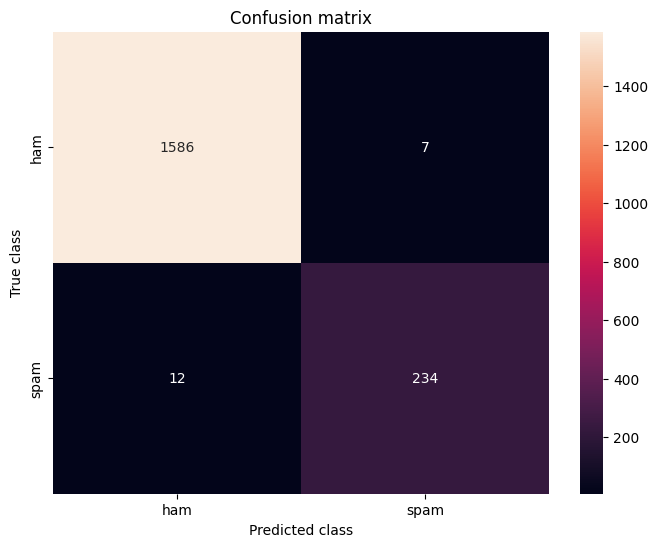

In [ ]:
# Mostramos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=[8, 6])
ax = sns.heatmap(conf_matrix,
                 annot=True,
                 fmt='d')

plt.xticks(ticks=[0.5, 1.5], labels=['ham', 'spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['ham', 'spam'], va='center')
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class');

In [ ]:
# Imprimimos el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [ ]:
# Imprimimos la exactitud total
print(accuracy_score(y_test, y_pred))

0.989668297988037


Usando el texto de los mensajes nuestro modelo se ha comportado extremadamente bien. Ha predicho correctamente el _spam_ el 98.97% de las veces.

In [ ]:
# Probamos con otros mensajes nuevos
text_clf.predict(["Hello, how are you doing?",
                  "Congratulations! You've been selected as a winner. Text WON to 45255."])

array(['ham', 'spam'], dtype=object)

Puedes encontrar más información sobre la extracción de características de los textos con Scikit-Learn en [Text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction).

## One-hot encoding

Como hemos comentado, en los vectores de frecuencia o conteo unos tokens tendrán más magnitud que otros en función de su frecuencia de aparición. Por el contrario, en la técnica de _**one-hot encoding**_ cada palabra o token de un texto corresponde a un elemento vectorial y cada token tiene un índice designado para sí mismo en el vector de palabra, donde ese índice está marcado con `1` mientras que los otros están marcados con `0` para representar una palabra en particular.

Este método implica la creación de un vocabulario con las palabras distintas de todo el corpus a las que se les asigna un identificador único, siendo la longitud de cada vector de palabra la longitud de este vocabulario.

Pongamos un ejemplo en el que tenemos un corpus formado por dos documentos:
```
doc_1 = "Hoy es un buen día, pero mañana será un mal día"
doc_2 = "Mañana será un buen día"
```

Después de preprocesar el texto, el vocabulario quedaría de la siguiente manera:

```
vocab = {'buen': 0, 'dia': 1, 'es': 2, 'hoy': 3, 'mal': 4,
         'mañana': 5, 'pero': 6, 'sera': 7, 'un': 8}
```

El vocabulario aquí consta de 9 palabras distintas y estas palabras pueden ser codificadas en vectores de longitud 9. Las representaciones en forma de vector de las palabras de este vocabulario serían:

```
  'buen' - [1,0,0,0,0,0,0,0,0]
   'dia' - [0,1,0,0,0,0,0,0,0]
    'es' - [0,0,1,0,0,0,0,0,0]
   'hoy' - [0,0,0,1,0,0,0,0,0]
   'mal' - [0,0,0,0,1,0,0,0,0]
'mañana' - [0,0,0,0,0,1,0,0,0]
  'pero' - [0,0,0,0,0,0,1,0,0]
  'sera' - [0,0,0,0,0,0,0,1,0]
    'un' - [0,0,0,0,0,0,0,0,1]
```

Cada palabra se escribe o codifica como un vector one-hot formado solo por un `1` en el lugar del índice que le corresponde y el resto `0`s (vector disperso) y cada vector es único. Esto permite que la palabra sea identificada de forma única por su vector one-hot y viceversa, es decir, no hay dos palabras que tengan la misma representación.

Dado que un palabra se representa como un vector, la lista de palabras del documento se puede representar como una matriz. Y, si tenemos una lista de documentos cuyas palabras están codificadas usando OHE, resultará a su vez en una matriz cuyos elementos son matrices, de modo que terminamos con un tensor tridimensional que se puede alimentar al algoritmo de aprendizaje automático.

Usando esta representación, los textos `doc_1 = "Hoy es un buen día, pero mañana será un mal día."` y `doc_2 = "Mañana será un buen día."` de nuestro corpus se pueden codificar de la siguiente manera:

```
          0 1 2 3 4 5 6 7 8
doc_1: [[0,0,0,1,0,0,0,0,0], - 'hoy'
        [0,0,1,0,0,0,0,0,0], - 'es'
        [0,0,0,0,0,0,0,0,1], - 'un'
        [1,0,0,0,0,0,0,0,0], - 'buen'
        [0,1,0,0,0,0,0,0,0], - 'dia'
        [0,0,0,0,0,0,1,0,0], - 'pero'
        [0,0,0,0,0,1,0,0,0], - 'mañana'
        [0,0,0,0,0,0,0,1,0], - 'sera'
        [0,0,0,0,0,0,0,0,1], - 'un'
        [0,0,0,0,1,0,0,0,0], - 'mal'
        [0,1,0,0,0,0,0,0,0]] - 'dia'
         
doc_2: [[0,0,0,0,0,1,0,0,0], - 'mañana'
        [0,0,0,0,0,0,0,1,0], - 'sera'
        [0,0,0,0,0,0,0,0,1], - 'un'
        [1,0,0,0,0,0,0,0,0], - 'buen'
        [0,0,0,0,0,0,0,0,0]] - 'dia'
```

Lo que ocurre en realidad cuando se aplica OHE a un documento de texto es que los tokens se reemplazan por sus vectores one-hot, y un documento dado se transforma a su vez en una matriz 2D con la forma de $N×M$, siendo $N$ el número de tokens del documento y $M$ el tamaño del vocabulario. Dependiendo de la cantidad de tokens que tenga el documento, en principio su forma será diferente, aunque el resultado de un proceso de OHE siempre es una matriz dispersa.

El principal beneficio de los vectores de palabras codificadas usando OHE es su uso para la clasificación de textos. Aunque esta aproximación tiene varios inconvenientes:
1. La enorme capacidad de memoria que se necesita. Consideremos que tenemos un corpus con 20.000 palabras únicas, un solo documento corto en ese corpus de quizás 40 palabras, estaría representado por una matriz con 40 filas y 20.000 columnas (una para cada palabra única) con un máximo de 40 elementos de la matriz distintos de cero. Esto deja muchos ceros y puede terminar ocupando una gran cantidad de memoria para albergar estas representaciones dispersas.
2. Estos vectores tan grandes y dispersos suelen llevar asociado además de problema es la maldición de la dimensionalidad.
3. La falta de representación del significado de modo que no se puede derivar similitudes entre palabras, es decir, las relaciones entre las palabras (el orden de aparición, las relaciones semánticas, etc.) se ignoran por completo en esta representación (por ejemplo, `'trabajo'` y `'ocupación'` se consideran palabras completamente independientes, aunque prácticamente tengan el mismo significado). Si bien con este enfoque capturamos bien la presencia y ausencia de palabras en un texto en particular, no podemos determinar fácilmente ningún significado a partir de la simple presencia/ausencia de estas palabras, es decir, perdemos el contexto.
4. Si alguna de las palabras del documento que estamos vectorizando no existe en el vocabulario en principio se ignora. Así, es necesario tener un vocabulario extenso para que este modelo funcione bien.

Como hemos comentado, el concepto de similitud entre palabras es difícil de extraer con esta técnica, ya que los vectores de palabras son estadísticamente ortogonales. En OHE todos los vectores son ortogonales entre sí, de modo el producto interno de dos vectores cualesquiera es cero y sus similitudes no se pueden medir por la distancia ni la similitud del coseno.

Tomemos, por ejemplo, los pares de palabras `'perro'` y  `'perros'`, o `'coche'` y `'auto'`. Claramente, estos pares de palabras son similares de diferente forma respectivamente. Se pueden utilizar herramientas tradicionales de NLP como la lematización en el preprocesamiento para ayudar a exponer la similitud entre el primer par de palabras; sin embargo, necesitamos un enfoque más sólido para abordar el descubrimiento de similitudes entre el segundo par de palabras.

Dado que el tamaño del vocabulario aumenta a medida que el corpus de entrenamiento se hace más grande y, como resultado, cada token estaría representado por vectores con una longitud cada vez mayor, las matrices serían cada vez más dispersas. En lugar de representaciones a nivel de palabra, un enfoque más común es usar caracteres como tokens, ya que limitará la longitud de los vectores.

Pero ya sea usando representaciones a nivel de palabra o de carácter, es inevitable que diferentes matrices de documentos tengan diferentes formas (diferente número de filas). Esto puede ser un problema para la mayoría de los modelos de aprendizaje automático, ya que esperan inputs con una forma constante. Por otro lado, los modelos basados en RNN, si se configuran correctamente, aunque no comparten esta preocupación debido a su naturaleza "recurrente", sí se espera que todas las instancias dentro del mismo lote compartan la misma longitud. Esto va a hacer necesario que debamos fijar una longitud máxima y constante para el documento de la entrada, de modo que los documentos más largos serán truncados y los más cortos rellenados, por ejemplo con vectores de 0s, hasta alcanzar la longitud especificada.

Además, aunque el tamaño del corpus de entrenamiento puede ser tan grande como queramos, haciendo que el vocabulario sea cada vez más rico, siempre existe la posibilidad de encontrar palabras desconocidas durante el tiempo de inferencia. Una forma de manejar esto es reservar algo de espacio en el vocabulario durante la inicialización, de modo que cuando aparezca una palabra fuera del vocabulario se pueda asignar a uno de estos lugares reservados _(out of vocabulary bucket)_.

Vamos a ver con un ejemplo sencillo cómo se implementaría en código:

In [ ]:
import numpy as np

In [ ]:
# Incluimos los textos ya preprocesados por sencillez
corpus = ['hoy es un buen dia pero mañana sera un mal dia',
          'mañana sera un buen dia']

# Creamos el vocabulario
vocab = {word: i for i, word in enumerate(sorted(list(set(' '.join(corpus).split()))))}
vocab

{'buen': 0,
 'dia': 1,
 'es': 2,
 'hoy': 3,
 'mal': 4,
 'mañana': 5,
 'pero': 6,
 'sera': 7,
 'un': 8}

In [ ]:
# Establecemos la longitud máxima del documento
# En este caso nos quedamos con la longitud del más largo
max_length = len(max([i.split() for i in corpus], key=len))

# Creamos una matriz 3D (tensor) y la inicializamos a cero
results = np.zeros(shape=(len(corpus),    # Nº de documentos del corpus
                          max_length,     # Longitud máxima que hemos establecido para los documentos
                          len(vocab)))    # Tamaño del vocabulario

In [ ]:
# Iteramos sobre los documentos del corpus
for i, doc in enumerate(corpus):
    # Iteramos sobre los tokens de cada documento
    for j, word in enumerate(doc.split()):
        # Obtenemos el id único correspondiente a cada
        # palabra usando el diccionario del vocabulario
        index = vocab.get(word)

        # Escribimos un 1 en la posición correspondiente
        results[i, j, index] = 1.

In [ ]:
results

array([[[0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.,

In [ ]:
results.shape

(2, 11, 9)

El resultado es una representación _one-hot encoding_ de los documentos de nuestro corpus como un tensor de forma (2, 11, 9).

# Practice

**Importa el conjunto de datos `amazonreviews.csv` y guárdalo en una variable llamada `data`. Muestra 10 registros aleatorios del conjunto de datos.**

In [ ]:
# Importa las librerías necesarias
# En realidad ya las tenemos importadas arriba
import pandas as pd

In [ ]:
# Importa los datos
df = pd.read_csv('/content/drive/MyDrive/data_saturdays/amazonreviews.tsv', sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


**Haz un conteo de las etiquetas de cada tipo.**

In [ ]:
df['label'].value_counts()

label
neg    5097
pos    4903
Name: count, dtype: int64

**Crea una variable `X` que contenga las reseñas y otra `y` que contenga las etiquetas.**

In [ ]:
X = df['review']
y = df['label']

**Divide el dataset en un conjunto de entrenamiento (70%) y otro de prueba (30%).**

In [ ]:
# Importa las librerías necesarias para hacer el entrenamiento del modelo
from sklearn.model_selection import train_test_split

In [ ]:
# Divide el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

**Construye la matriz de términos del conjunto de datos de entrenamiento usando `CountVectorizer` para obtener las bolsas de palabras de las reseñas. Muestra las dimensiones de la matriz de términos.**

In [ ]:
# Importa las librerías
# importamos de sklearn el método CounVectorizer() para construir matrices
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Instancia la clase CountVectorizer
count_vect = CountVectorizer()
# Obtén la matriz de términos
X_train_counts = count_vect.fit_transform(X_train)
# Muestra sus dimensiones
X_train_counts.shape

(6700, 25820)

**Ahora que tenemos los conteos de palabras de nuestros datos de entrenamiento, genera una nueva matriz de términos con los valores TD-IDF correspondientes. Muestra también sus dimensiones para comprobar que son correctas.**

In [ ]:
# Importa las librerías
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# Importa las librerías
# importamos de sklearn el método CounVectorizer() para construir matrices
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Instancia la clase TfidfTransformer
tfid_transformer = TfidfTransformer()
# Obtén la matriz de términos
X_train_tfidf = tfid_transformer.fit_transform(X_train_counts)
# Muestra sus dimensiones
X_train_tfidf.shape

(6700, 25820)

**Convierte la matriz dispersa que has generado en un DataFrame.**

In [ ]:
df_tfidf = pd.DataFrame.sparse.from_spmatrix(X_train_tfidf)

**Selecciona la review de índice 2500 del conjunto de entrenamiento.**

In [ ]:
review_2500=X_train[2500]
print(review_2500)

A great collection of songs on this karaoke disc: 1. The Winner Takes It All - ABBA2. Dancing Queen - ABBA3. Waterloo - ABBA4. Take A Chance On Me - ABBA5. Fernando - ABBA6. I Do, I Do, I Do, I Do, I Do - ABBA7. Gimme Gimme Gimme - ABBA8. Does Your Mother Know - ABBA9. I Have A Dream - ABBA10. Knowing Me, Knowing You - ABBA11. Chiquita - ABBA12. The Name Of The Game - ABBA13. SOS - ABBA14. Thank You For The Music - ABBA


**Comprueba que efectivamente tenemos la puntuación TD-IDF para algunos de los términos que la componen.**

In [ ]:
# Ejemplo 1


0.12485404614304174

In [ ]:
# Ejemplo 2


0.08139515339077955

**Selecciona los términos para esa reseña con los valores de TD-IDF máximo y mínimo (diferente de cero). Pista: investiga las funciones `idxmax()` e `idxmin()`.**

In [ ]:
# Término con el máximo TD-IDF


'rf'

In [ ]:
# Término con el mínimo TD-IDF (diferente de cero)


'was'

**Entrena un clasificador `LinearSVC` usando los datos de entrenamiento.**

In [ ]:
# Importa las librerías


In [ ]:
# Instancia el clasificador

# Entrena el clasificador


LinearSVC()

**Realiza las predicciones usando los datos de prueba. Recuerda que primero deberás obtener la matriz de términos con las puntuaciones TD-IDF para el conjunto de entrenamiento.**

In [ ]:
# Obtén la matriz de términos (2 pasos)


In [ ]:
# Realiza las predicciones


**Muestra la matriz de confusión y el informe de clasificación.**

In [ ]:
# Importa las librerías


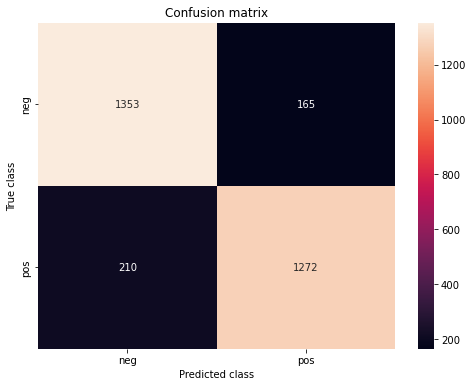

In [ ]:
# Mostramos la matriz de confusión


In [ ]:
# Imprime el informe de clasificación


              precision    recall  f1-score   support

         neg       0.87      0.89      0.88      1518
         pos       0.89      0.86      0.87      1482

    accuracy                           0.88      3000
   macro avg       0.88      0.87      0.87      3000
weighted avg       0.88      0.88      0.87      3000

